Gerekli Kurulumlar

In [ ]:
!pip install tensorflow tensorflow-gpu opencv-python matplotlib

In [ ]:
import tensorflow as tf
import os

In [ ]:
gpus = tf.config.experimental.list_physical_devices("GPU")
for gpu in gpus:
  tf.config.experimental.set_memory_growth(gpu,True)

Drive Bağlanma

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


Veri Setini Yükleme

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
!unzip /content/drive/MyDrive/Dataset/archive.zip

Görüntülenen çıkış son 5000 satıra kısaltıldı.
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_116.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_118.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_126.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_134.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_141.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_168.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_175.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_183.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_221.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_222.png  
  inflating: cell_image

In [ ]:
tf.keras.utils.image_dataset_from_directory??

In [ ]:
data = tf.keras.utils.image_dataset_from_directory("/content/cell_images/cell_images")

Found 27558 files belonging to 2 classes.


In [ ]:
data_iterator = data.as_numpy_iterator()

In [ ]:
batch = data_iterator.next()

In [ ]:
len(batch)   # Bu kısımda veri setimizde hem etiketlerin hem görüntülerin olduğunu anlıyoruz.

2

In [ ]:
batch[0].shape  # Veriler numpy dizileri olarak temsil edilir.

(32, 256, 256, 3)

In [ ]:
batch[1]   #Etiketler

array([0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 0], dtype=int32)

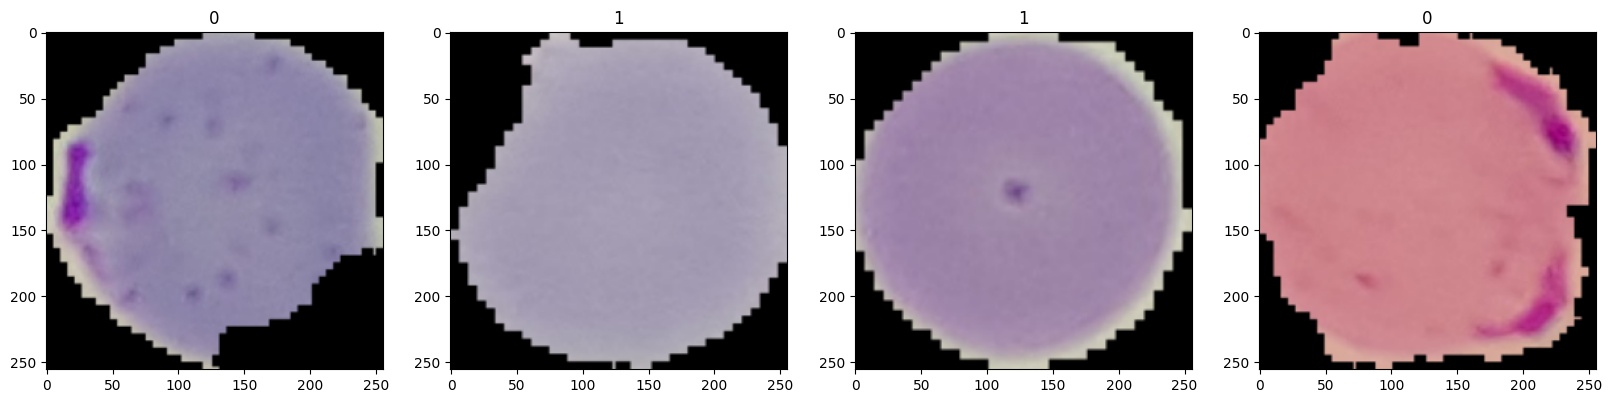

In [ ]:
#'Parasitized': 0, 'Uninfected': 1
fig,ax = plt.subplots(ncols=4,figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(batch[1][idx])

Verilere Ön İşlem Yapma

In [ ]:
#Ölçeklendirme  #Verilerin 0/1 arasındaki bir değere atıyoruz [normalization]
data = data.map(lambda x,y:(x/255,y))

In [ ]:
data.as_numpy_iterator().next()

(array([[[[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],
 
         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],
 
         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],
 
         ...,
 
         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],
 
         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],
 
         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]]],
 
 
        [

Veri Setini Bölme (Train-Test-Validation)

In [ ]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [ ]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [ ]:
print(len(train))
print(len(val))
print(len(test))

603
172
86


Model Oluşturma

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout

In [ ]:
model = Sequential()

model.add(Conv2D(16,(3,3),1 , activation="relu" ,input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32,(3,3),1 , activation="relu"))
model.add(MaxPooling2D())

model.add(Conv2D(16,(3,3),1 , activation="relu"))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256,activation="relu"))
model.add(Dense(1,activation="sigmoid"))

Model Derleme

In [ ]:
model.compile(optimizer="adam",loss=tf.losses.BinaryCrossentropy(),metrics=["accuracy"])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

Model Eğitimi

In [ ]:
!mkdir logs

In [ ]:
logdir = "/content/logs"

In [ ]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [ ]:
hist = model.fit(train,epochs=16,validation_data=val,callbacks=[tensorboard_callback])

Epoch 1/16
603/603 [==============================] - 124s 195ms/step - loss: 0.3611 - accuracy: 0.8417 - val_loss: 0.3121 - val_accuracy: 0.9021
Epoch 2/16
603/603 [==============================] - 76s 125ms/step - loss: 0.1928 - accuracy: 0.9373 - val_loss: 0.2038 - val_accuracy: 0.9355
Epoch 3/16
603/603 [==============================] - 117s 193ms/step - loss: 0.1638 - accuracy: 0.9465 - val_loss: 0.1729 - val_accuracy: 0.9491
Epoch 4/16
603/603 [==============================] - 98s 162ms/step - loss: 0.1327 - accuracy: 0.9550 - val_loss: 0.1752 - val_accuracy: 0.9477
Epoch 5/16
603/603 [==============================] - 77s 128ms/step - loss: 0.1048 - accuracy: 0.9642 - val_loss: 0.2202 - val_accuracy: 0.9404
Epoch 6/16
603/603 [==============================] - 120s 199ms/step - loss: 0.0806 - accuracy: 0.9727 - val_loss: 0.2175 - val_accuracy: 0.9477
Epoch 7/16
603/603 [==============================] - 117s 194ms/step - loss: 0.0604 - accuracy: 0.9792 - val_loss: 0.2569 - va

Model Performansı Görüntüleme

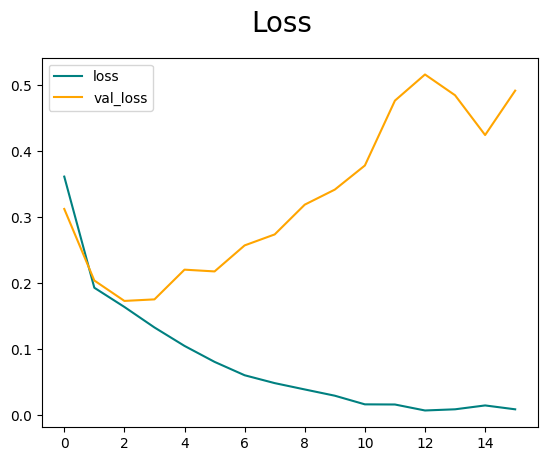

In [ ]:
# Modelin verdiği kayıp değerlerinin görüntülenmesi
fig = plt.figure()
plt.plot(hist.history["loss"],color="teal",label="loss")
plt.plot(hist.history["val_loss"],color="orange",label="val_loss")
fig.suptitle("Loss",fontsize=20)
plt.legend(loc="upper left")
plt.show()

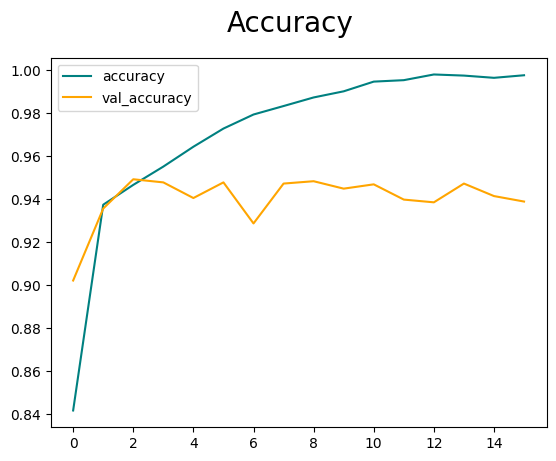

In [ ]:
# Modelin verdiği doğruluk değerlerinin görüntülenmesi
fig = plt.figure()
plt.plot(hist.history["accuracy"],color="teal",label="accuracy")
plt.plot(hist.history["val_accuracy"],color="orange",label="val_accuracy")
fig.suptitle("Accuracy",fontsize=20)
plt.legend(loc="upper left")
plt.show()

Modeli Değerlendirme

In [ ]:
from tensorflow.keras.metrics import Precision,Recall,BinaryAccuracy

In [ ]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [ ]:
for batch in test.as_numpy_iterator():
  X, y = batch
  yhat = model.predict(X)
  pre.update_state(y,yhat)
  re.update_state(y,yhat)
  acc.update_state(y,yhat)

1/1 [==============================] - 0s 61ms/step


In [ ]:
print(f"Hassaslık : {pre.result().numpy()}, Hatırlama: {re.result().numpy()}, Kesinlik: {acc.result().numpy()}")

Hassaslık : 0.945868968963623, Hatırlama: 0.9400428533554077, Kesinlik: 0.9418604373931885


Modeli Kaydetme

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
!mkdir save_model

In [ ]:
model.save(os.path.join("/content/save_model","malaria_detection.h5"))

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
